In [29]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from timeit import default_timer as timer

import importlib
import utils
import networks

# change the default figure size
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams.update({'font.size': 10})

learning_rates = ['0.003', '0.0003', '3e-05', '3e-06', '3e-07'] # add more as needed
loss_components = ['PDE_Weight','BC_Weight','Data_Weight']

# Define a function to load data and return the loss list
def load_loss(path, column_name):
    return pd.read_csv(path)[column_name].to_numpy()

# Define a function to load data and return the mse loss list
def load_mse_loss(path):
    return pd.read_csv(path)['Average_MSE_Loss'].to_numpy()


# Check how learning rate affect AWPINN and AWIPINN performance

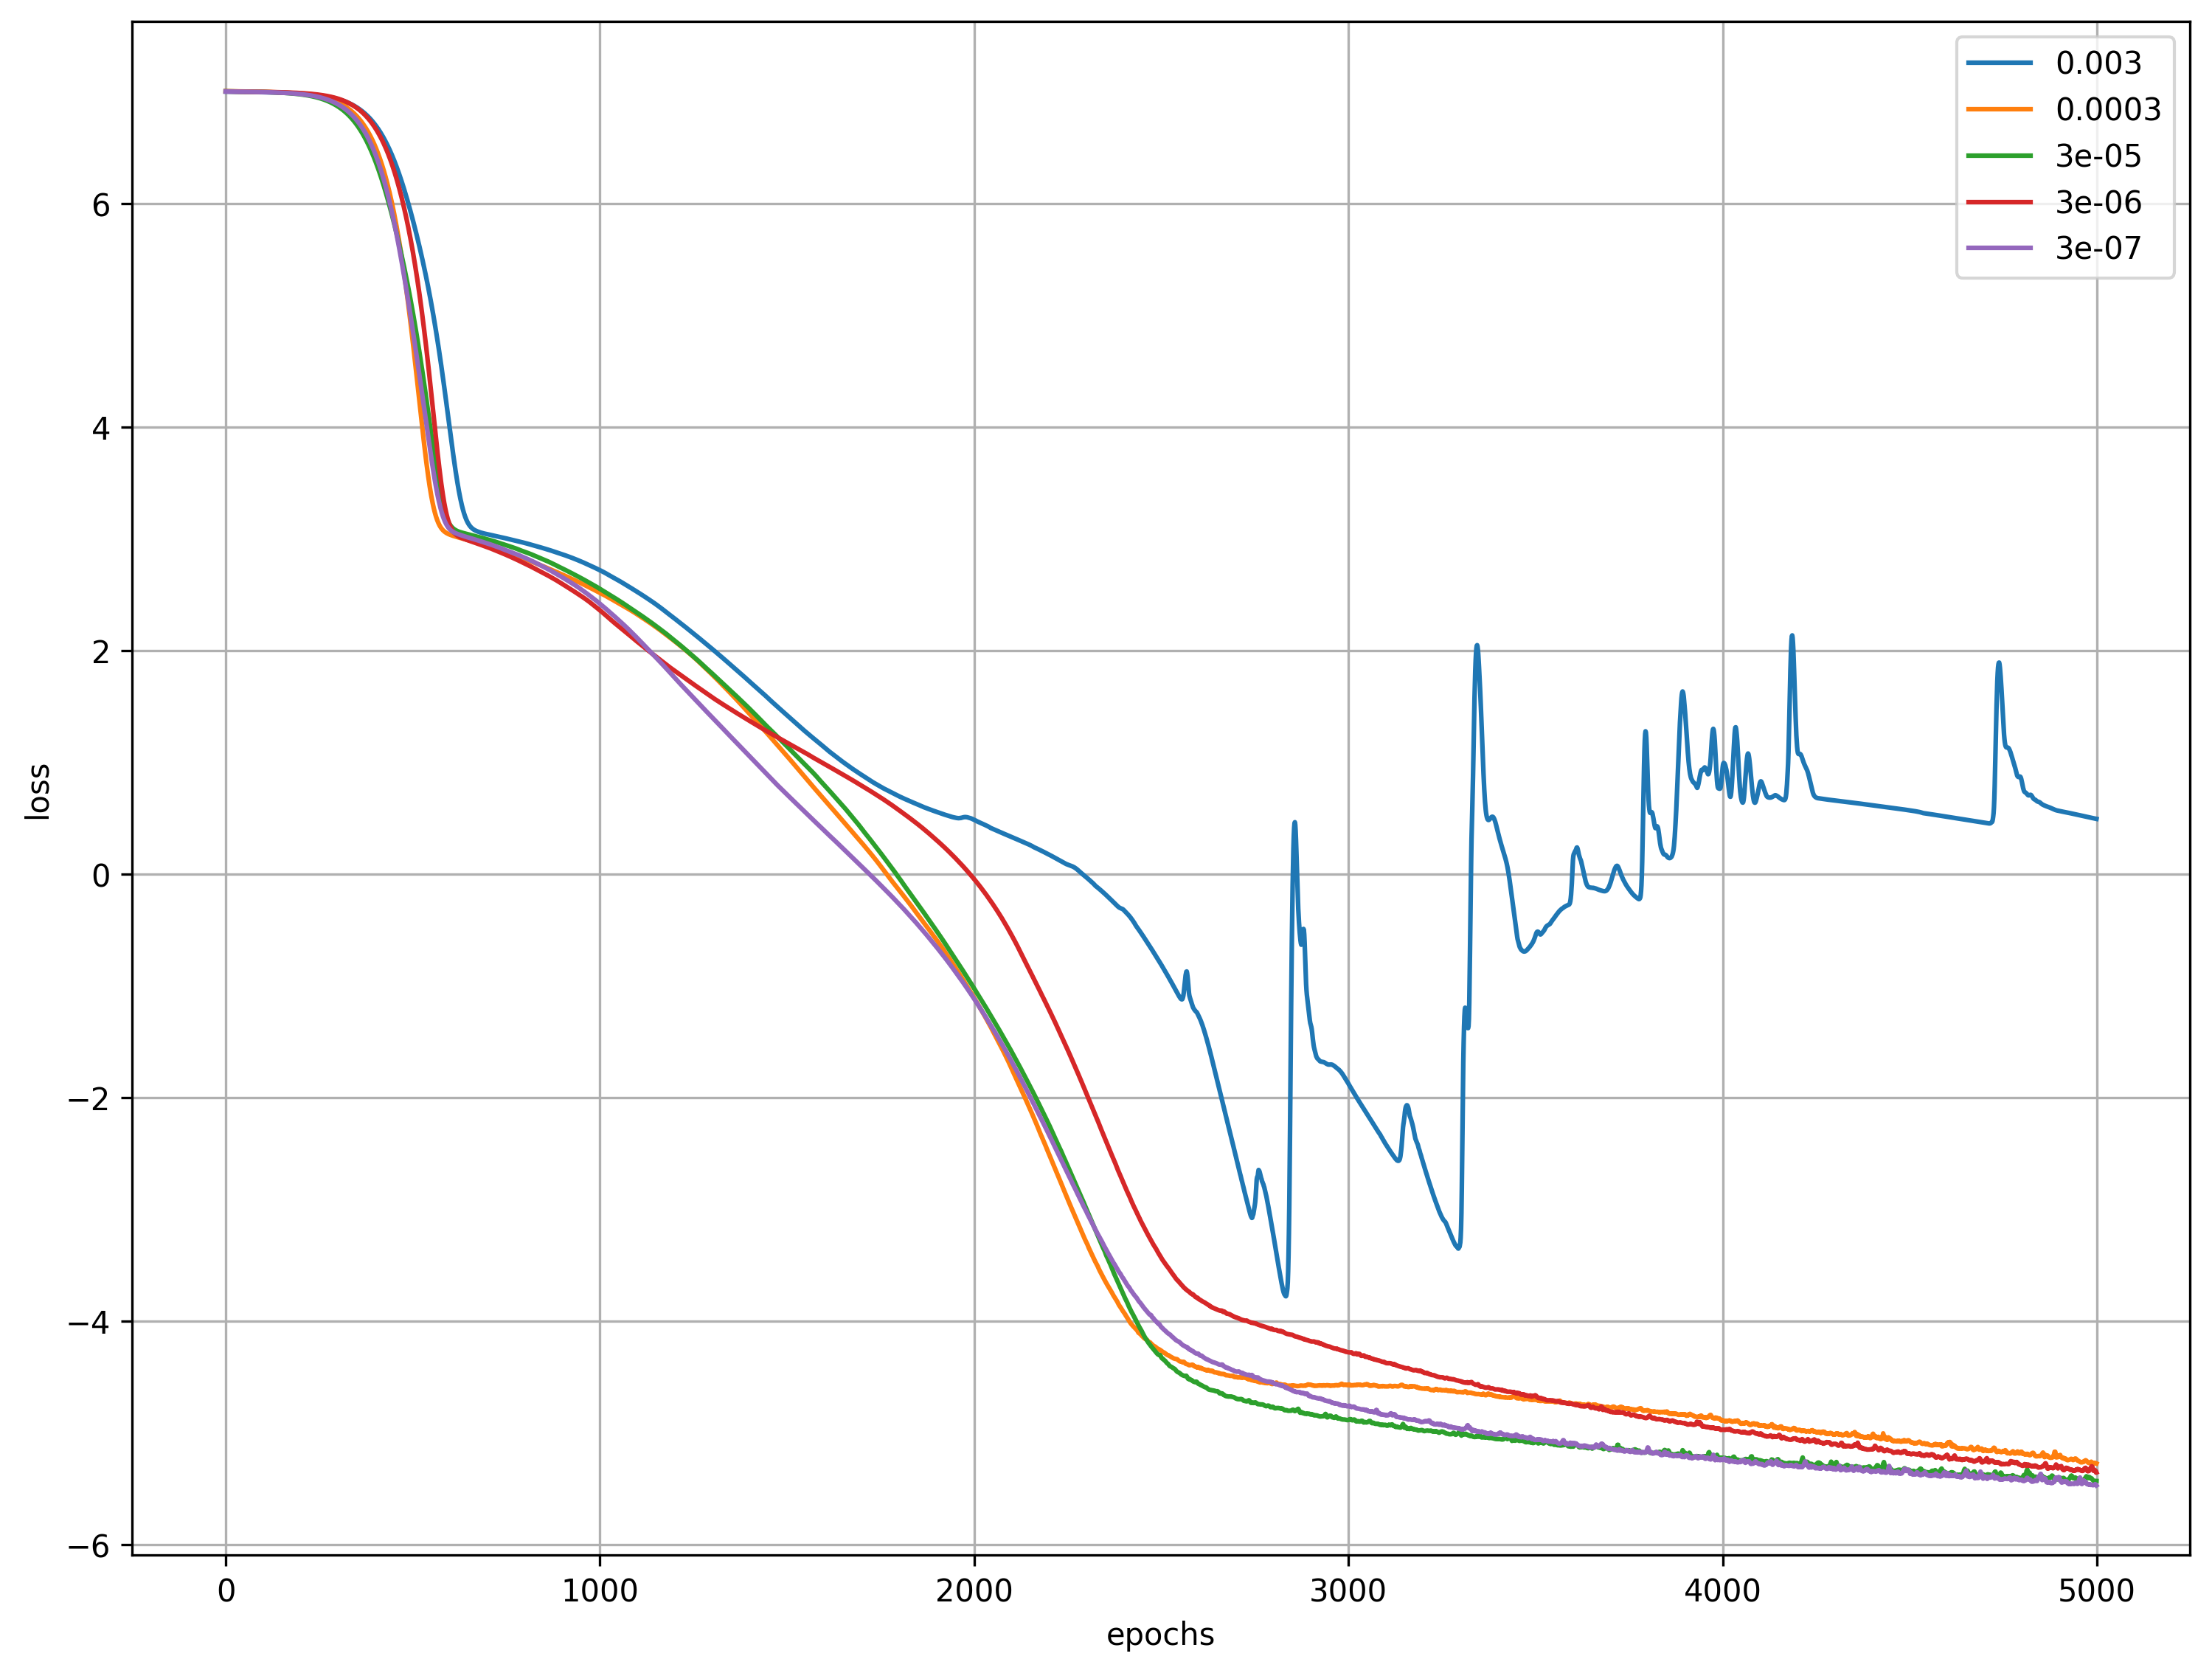

In [32]:
# Store configurations
awpinn_path = 'test_learning_rate/awpinn'

# Load the data using a loop
loss_lists = [load_mse_loss(awpinn_path + '/' + lr + '/average_loss.csv') for lr in learning_rates]

fig = plt.figure(figsize=(12, 9))
# Plot the data
for loss_list, label in zip(loss_lists, learning_rates):
    plt.plot(range(5000), np.log(loss_list[:5000]), label=label)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
# plt.savefig(f'test_learning_rate/plot/awpinn_weights.png', bbox_inches='tight')

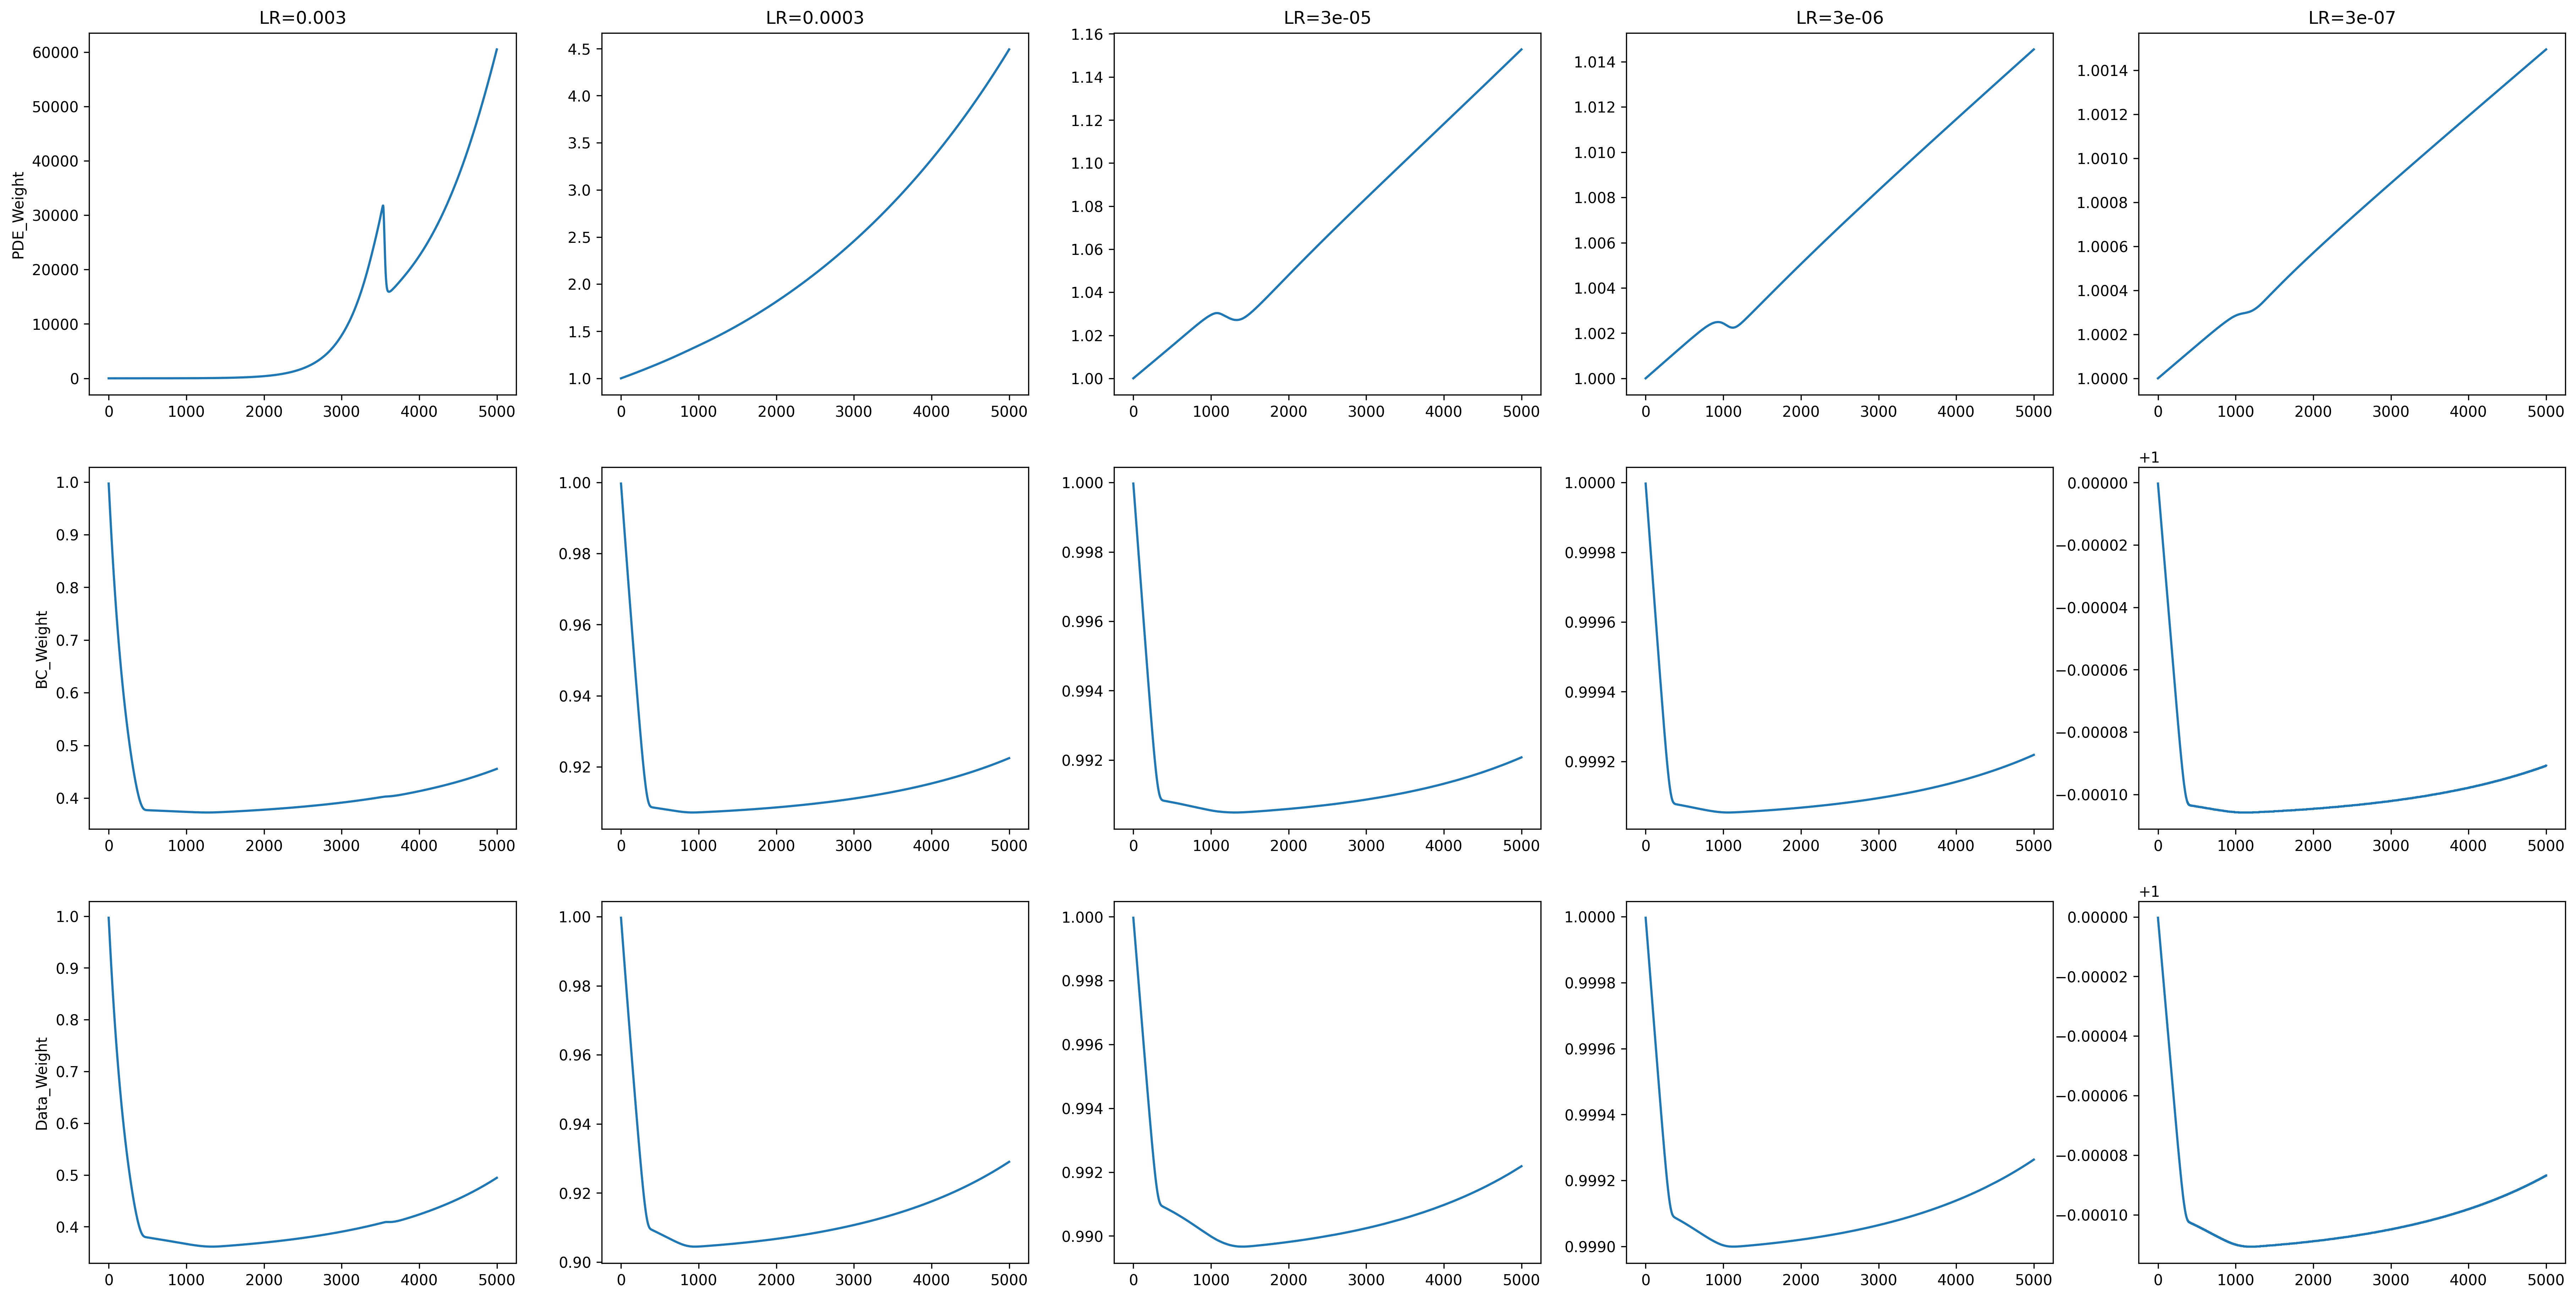

In [44]:
fig, axes = plt.subplots(3, 5, figsize=(30, 15))
for i, loss_component in enumerate(loss_components):
    for j, lr in enumerate(learning_rates):
        ax = axes[i][j]
        weights_list = load_loss(f"{awpinn_path}/weights/{lr}.csv", loss_component)  # Using our function to load data
        ax.plot(weights_list, label=f"LR={lr}")
        # Set title only for the top row
        if i == 0:
            ax.set_title(f"LR={lr}")
        
        # Set y-label only for the leftmost column
        if j == 0:
            ax.set_ylabel(loss_component)
        
        # Remove legends except for the top-left
        # if i == 0 and j == 0:
        #     ax.legend([f"LR={lr}"])
        # else:
        #     ax.legend().set_visible(False)

# awipinn


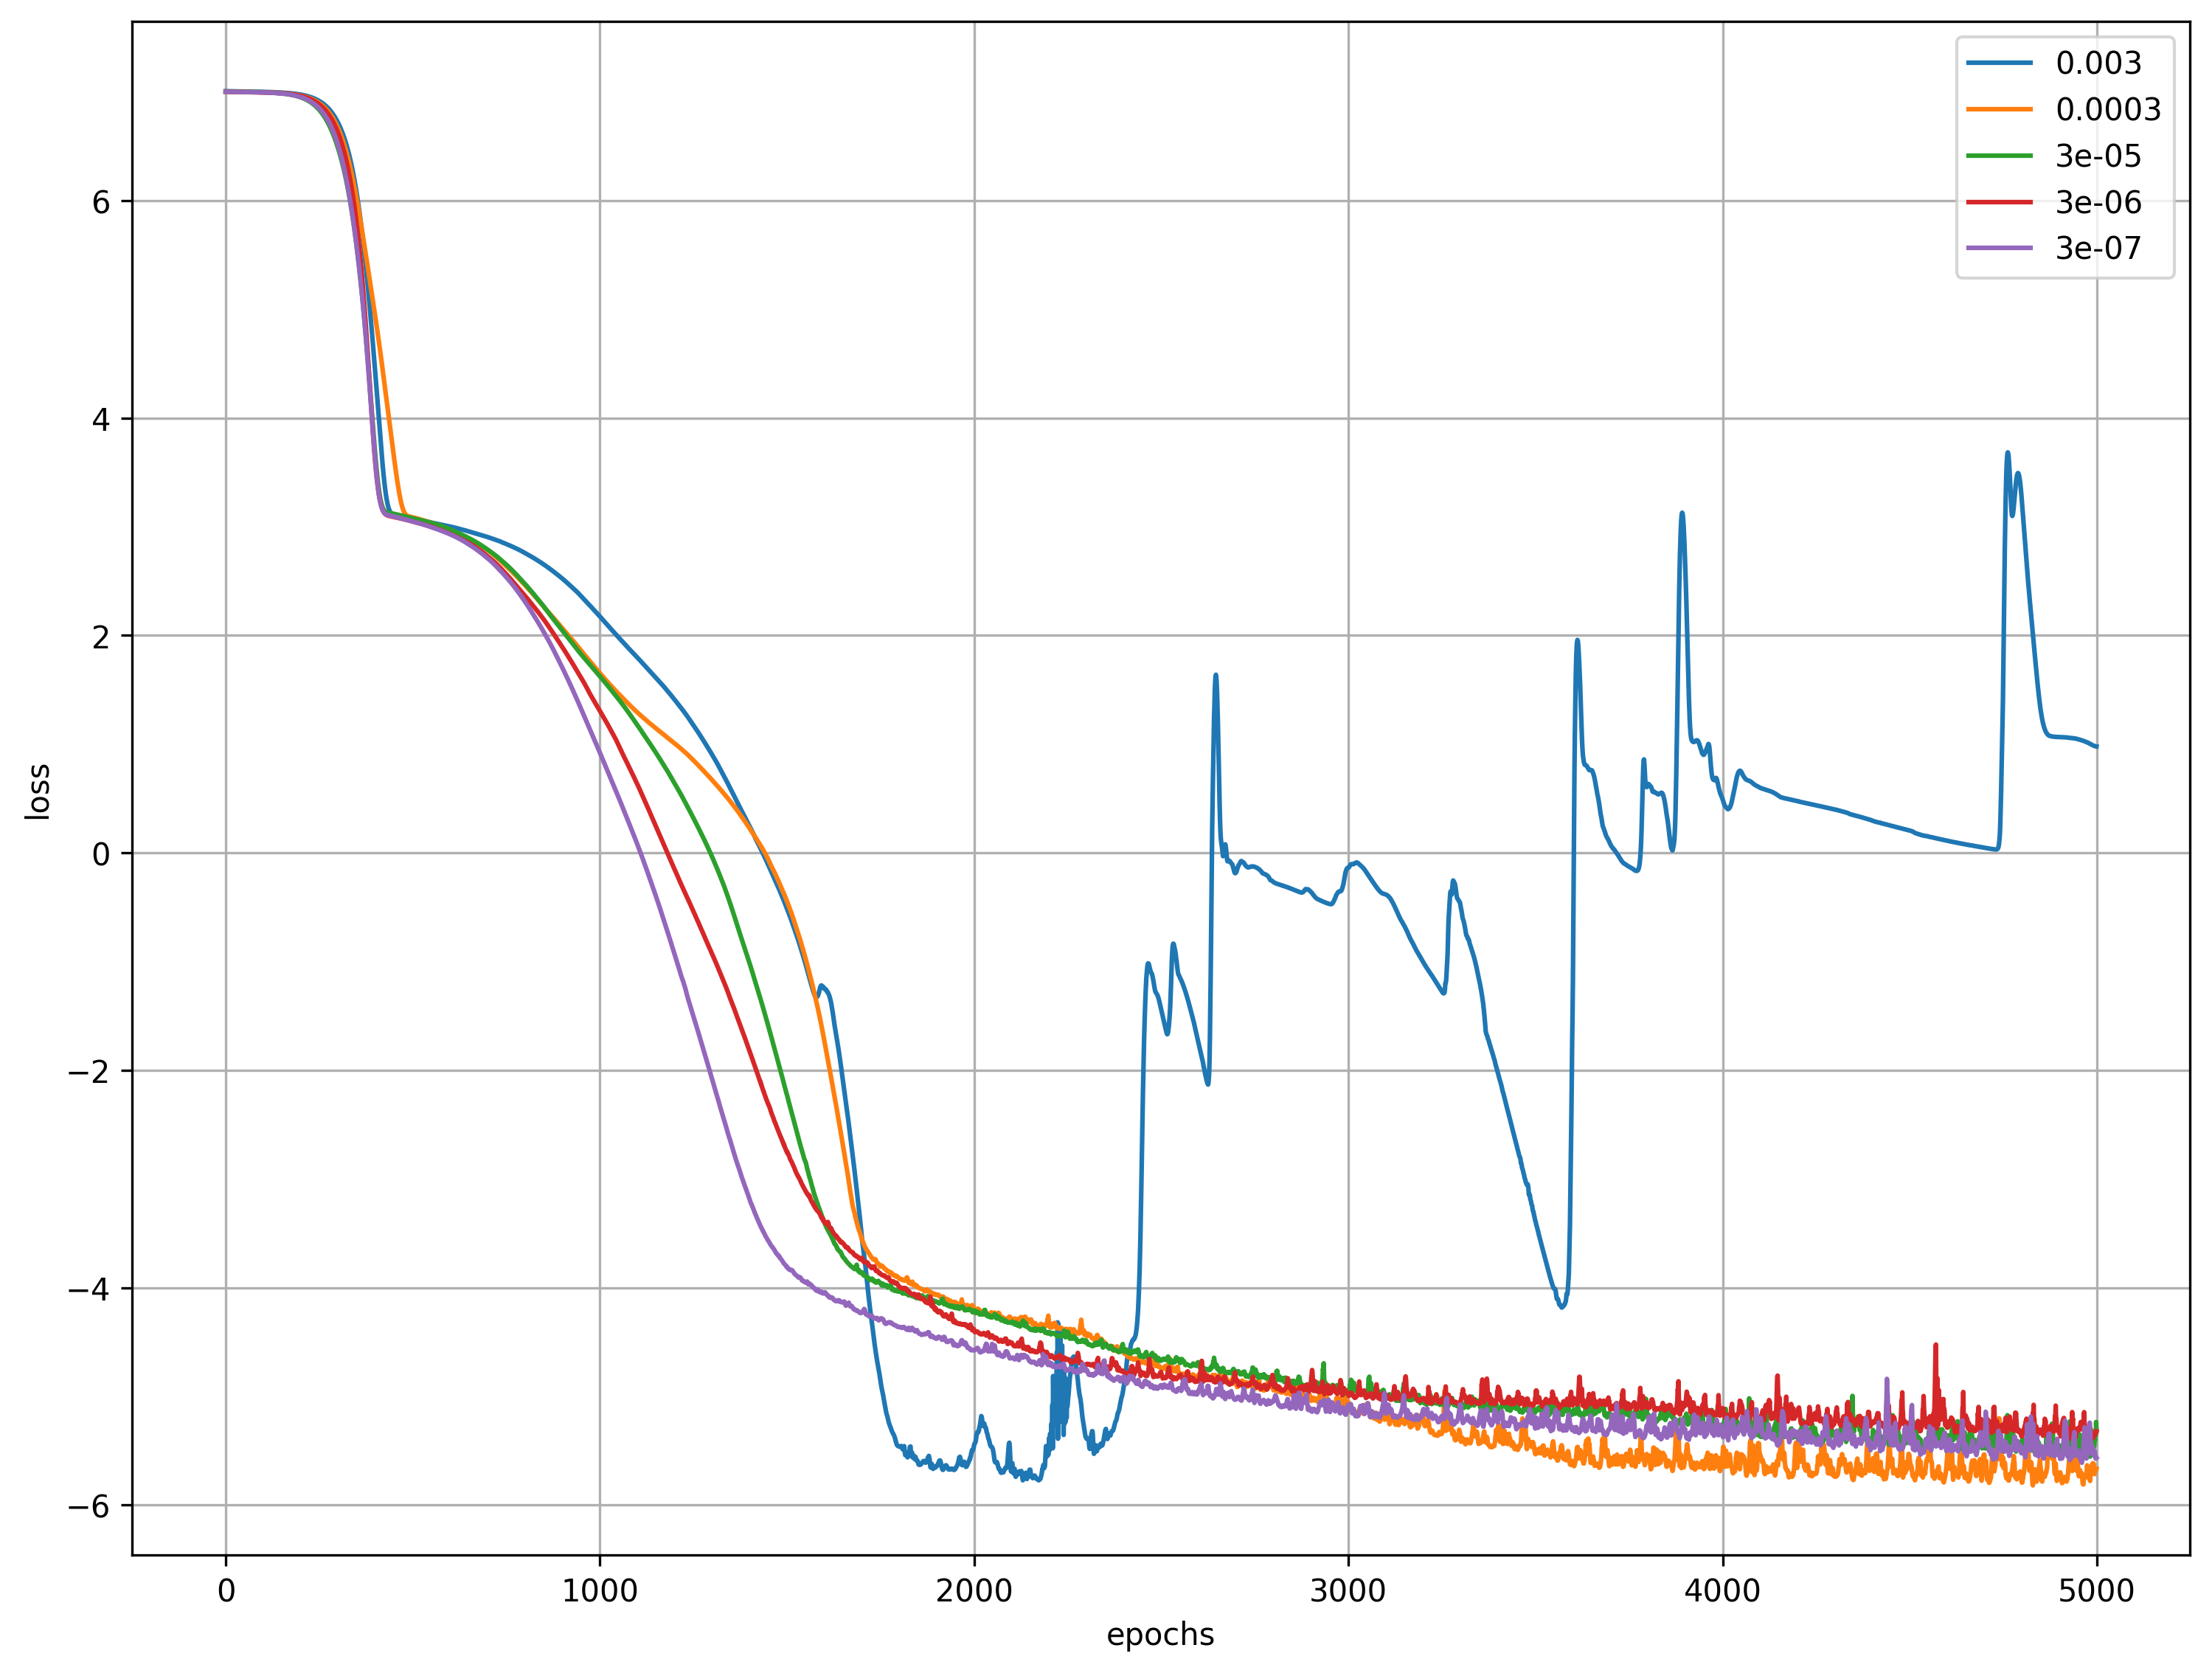

In [37]:
# Store configurations
awipinn_path = 'test_learning_rate/awipinn'

# Load the data using a loop
loss_lists = [load_mse_loss(awpinn_path + '/' + lr + '/average_loss.csv') for lr in learning_rates]

fig = plt.figure(figsize=(12, 9))
# Plot the data
for loss_list, label in zip(loss_lists, learning_rates):
    plt.plot(range(5000), np.log(loss_list[:5000]), label=label)

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
# plt.savefig(f'test_learning_rate/plot/awipinn_weights.png', bbox_inches='tight')

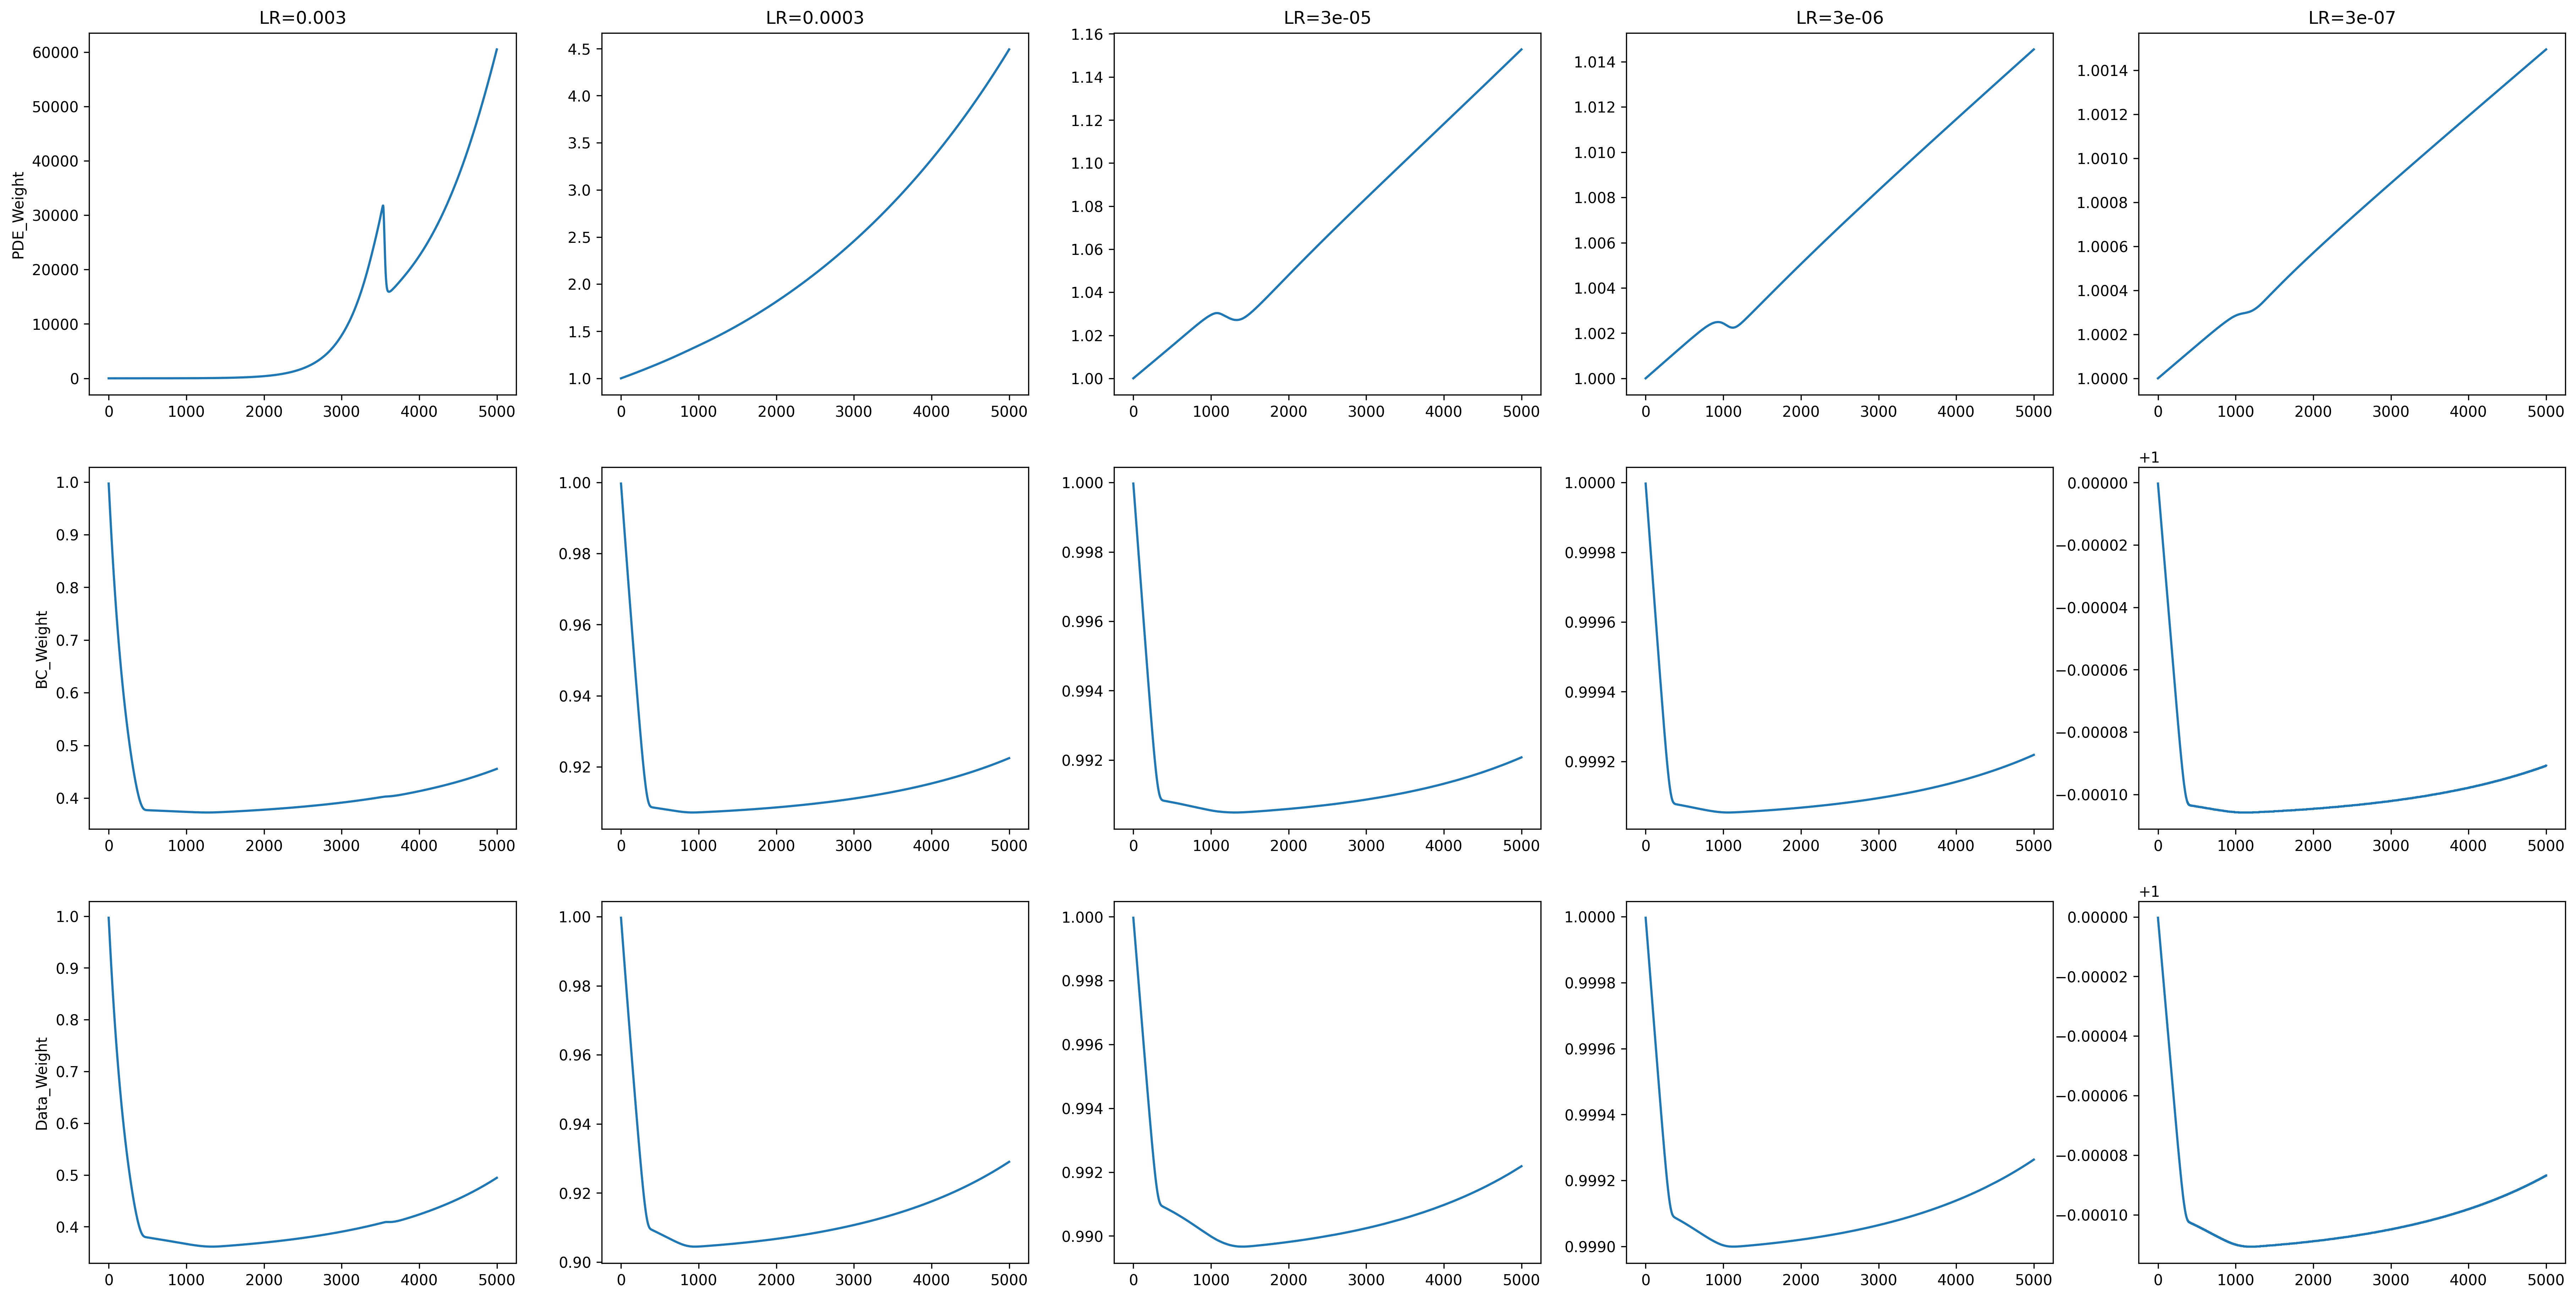

In [45]:
fig, axes = plt.subplots(3, 5, figsize=(30, 15))
for i, loss_component in enumerate(loss_components):
    for j, lr in enumerate(learning_rates):
        ax = axes[i][j]
        weights_list = load_loss(f"{awipinn_path}/weights/{lr}.csv", loss_component)  # Using our function to load data
        ax.plot(weights_list, label=f"LR={lr}")
        # Set title only for the top row
        if i == 0:
            ax.set_title(f"LR={lr}")
        
        # Set y-label only for the leftmost column
        if j == 0:
            ax.set_ylabel(loss_component)
        
        # Remove legends except for the top-left
        # if i == 0 and j == 0:
        #     ax.legend([f"LR={lr}"])
        # else:
        #     ax.legend().set_visible(False)